In [1]:
from edbo.bro import BO_express

C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


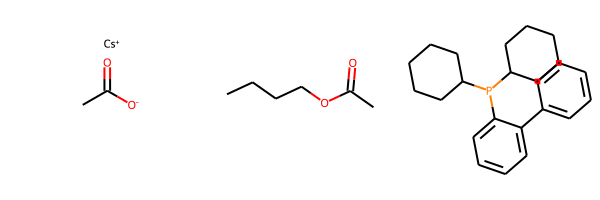

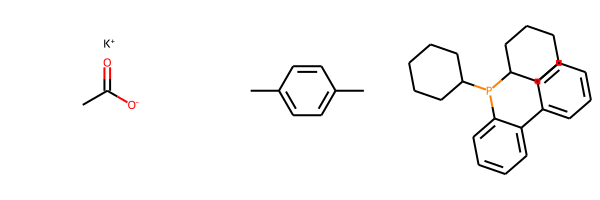

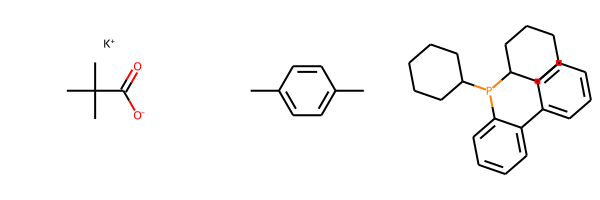

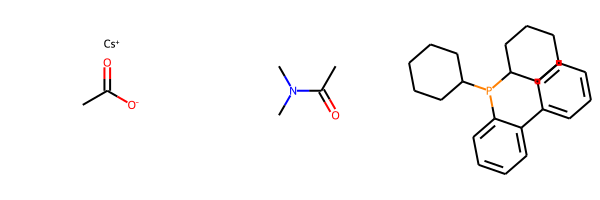

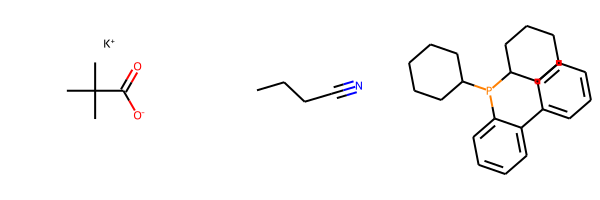

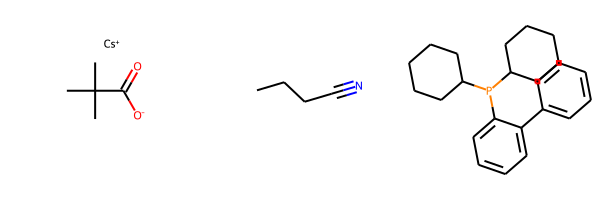

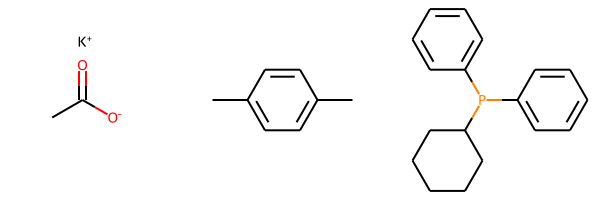

,reagent_SMILES_index,solvent_SMILES_index,catalyst_one_SMILES_index,solvent_conc_index,temperature_index
195,O=C([O-])C.[Cs+],CCCCOC(C)=O,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,98.039215,120
63,O=C([O-])C.[K+],CC1=CC=C(C)C=C1,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,263.157900,120
138,O=C([O-])C(C)(C)C.[K+],CC1=CC=C(C)C=C1,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,150.000000,120
158,O=C([O-])C.[Cs+],CC(N(C)C)=O,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,150.000000,90
106,O=C([O-])C(C)(C)C.[K+],CCCC#N,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,98.039215,105
249,O=C([O-])C(C)(C)C.[Cs+],CCCC#N,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,98.039215,120
55,O=C([O-])C.[K+],CC1=CC=C(C)C=C1,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,263.157900,105


In [1]:
# (1) Define a dictionary of components
    
reaction_components={
    'reagent':['O=C([O-])C.[K+]','O=C([O-])C(C)(C)C.[K+]','O=C([O-])C.[Cs+]', 'O=C([O-])C(C)(C)C.[Cs+]'],
    'solvent': ['CC(N(C)C)=O', 'CCCC#N' ,'CCCCOC(C)=O', 'CC1=CC=C(C)C=C1'],
    'catalyst_one':['P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3','C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4'],
    'solvent_conc': [263.1579, 150, 98.039215],
    'temperature': [120, 105, 90]}

encoding={'reagent':'smiles',
          'solvent':'smiles',
          'catalyst_one':'smiles',
          'solvent_conc':'numeric',
          'temperature':'numeric'}

bo = BO_express(reaction_components=reaction_components, 
                encoding=encoding,
                batch_size=7,
                init_method='rand',
                acquisition_function='TS',
                target='yield')

print('\n')
bo.init_seq.visualize = False        # Don't visualize clustering results
bo.init_sample()                     
print('\n')
bo.get_experiments(structures=True)

In [2]:
bo.export_proposed('init.csv') 

In [3]:
bo.save()

In [4]:
from edbo.bro import BO_express

bo = BO_express()
bo.load()

In [5]:
bo.add_results('results/init.csv')

In [6]:
bo.run()

,reagent_ABC,reagent_ATS0Z,reagent_AATS0Z,reagent_AATS0p,reagent_ATSC4Z,reagent_ATSC0are,reagent_ATSC4p,reagent_ATSC2i,reagent_AATSC1m,reagent_AATSC1are,...,solvent_ATSC6c,solvent_ATSC3dv,solvent_ATSC7dv,solvent_ATSC4d,solvent_MATS2dv,solvent_GATS1i,solvent_SpAbs_Dzv,catalyst_one_ABC,solvent_conc,temperature
176,0.0,0.958963,1.000000,1.000000,0.000000,0.378738,0.000000,1.000000,1.000000,1.000000,...,0.215262,1.0,0.348762,0.480769,0.564073,0.291218,0.000000,1.0,0.314687,0.0
150,0.0,0.958963,1.000000,1.000000,0.000000,0.378738,0.000000,1.000000,1.000000,1.000000,...,0.215262,0.0,0.348762,1.000000,0.155569,1.000000,0.279373,0.0,0.000000,1.0
26,0.0,0.000000,0.084203,0.369078,0.000000,0.000000,0.000000,0.000000,0.048548,0.615422,...,0.215262,1.0,0.348762,0.480769,0.564073,0.291218,0.000000,0.0,0.000000,0.0
83,1.0,0.041037,0.000000,0.000000,0.126901,0.638799,0.551559,0.549526,0.000000,0.000000,...,0.215262,0.0,0.348762,1.000000,0.155569,1.000000,0.279373,1.0,1.000000,0.0
240,1.0,1.000000,0.430963,0.296905,1.000000,1.000000,1.000000,0.863079,0.110847,0.130876,...,0.215262,1.0,0.348762,0.480769,0.564073,0.291218,0.000000,0.0,0.000000,1.0
164,0.0,0.958963,1.000000,1.000000,0.000000,0.378738,0.000000,1.000000,1.000000,1.000000,...,0.215262,1.0,0.348762,0.480769,0.564073,0.291218,0.000000,0.0,1.000000,0.0
20,0.0,0.000000,0.084203,0.369078,0.000000,0.000000,0.000000,0.000000,0.048548,0.615422,...,0.215262,1.0,0.348762,0.480769,0.564073,0.291218,0.000000,0.0,1.000000,0.0


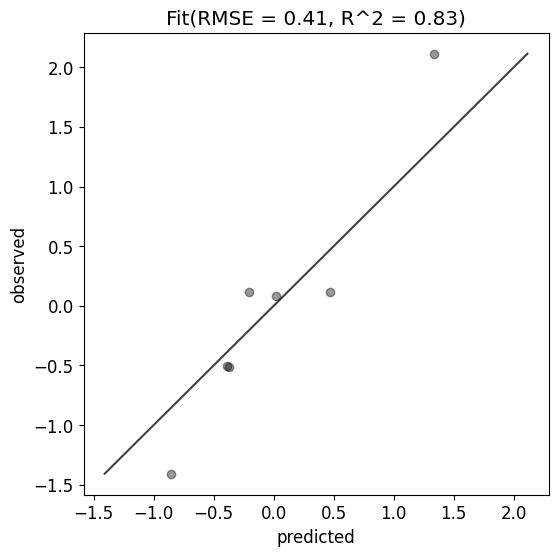

In [7]:
bo.model.regression()

In [8]:
bo.export_proposed('round0.csv')

In [9]:
def workflow(export_path):
    """
    Function for our BO pipeline.
    """
    bo.plot_convergence()
    bo.model.regression()
    bo.export_proposed(export_path)

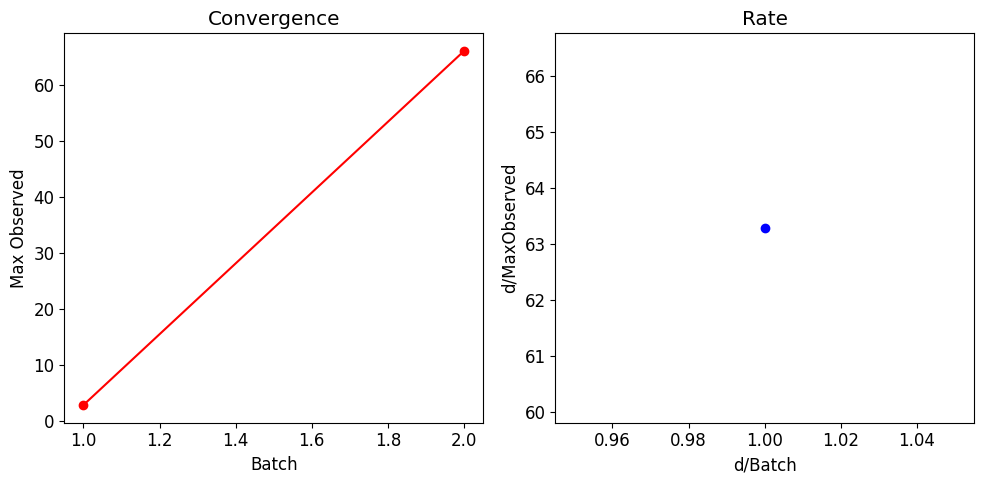

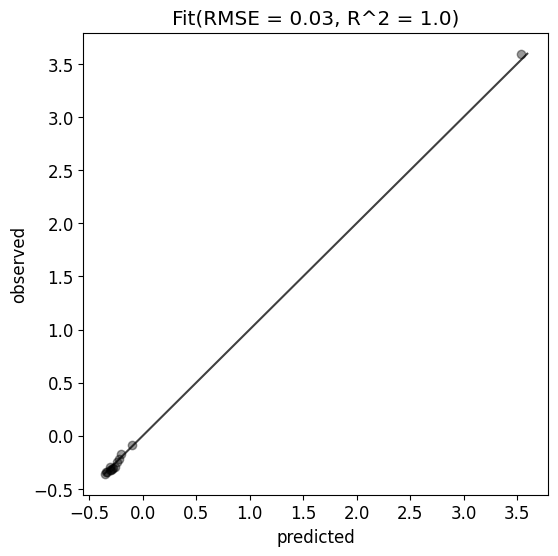

In [10]:
bo.add_results('results/round0.csv')  
bo.run()
workflow('round1.csv')

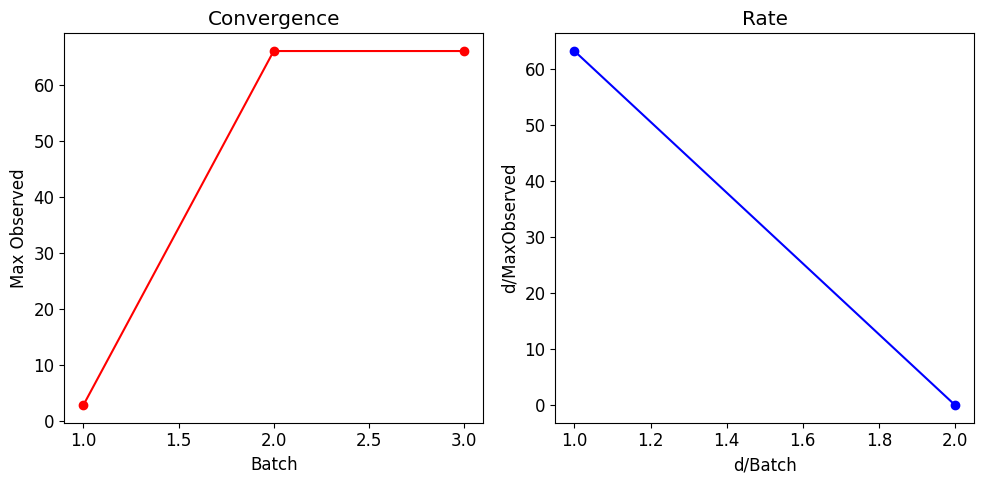

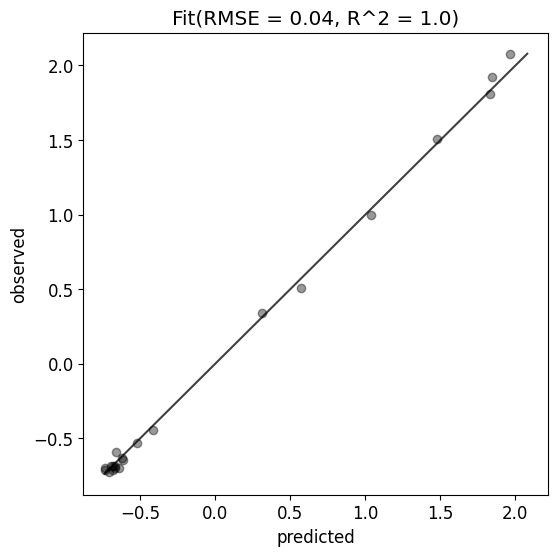

In [11]:
bo.add_results('results/round1.csv')
bo.run()
workflow('round2.csv')   

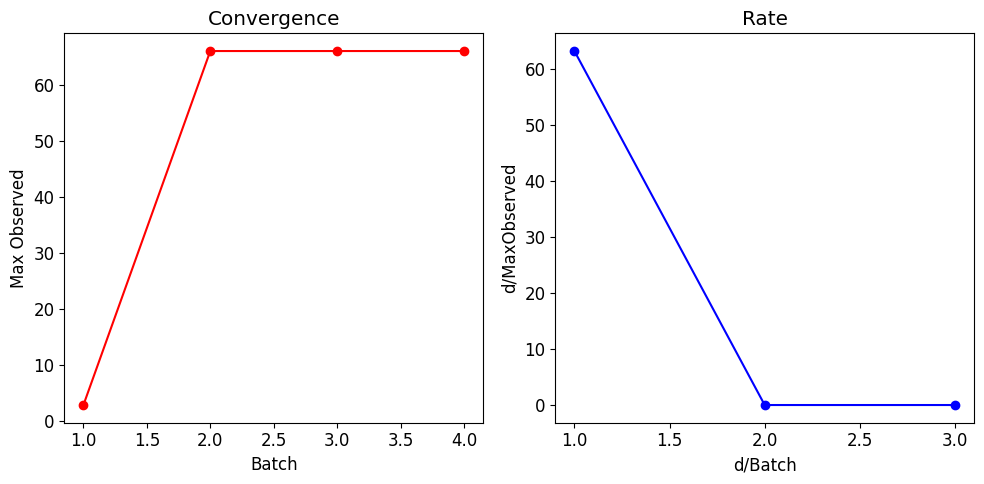

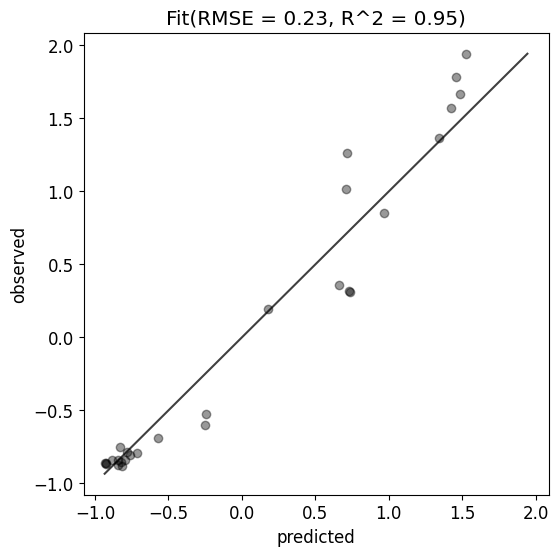

In [12]:
bo.add_results('results/round2.csv')
bo.run()
workflow('round3.csv') 

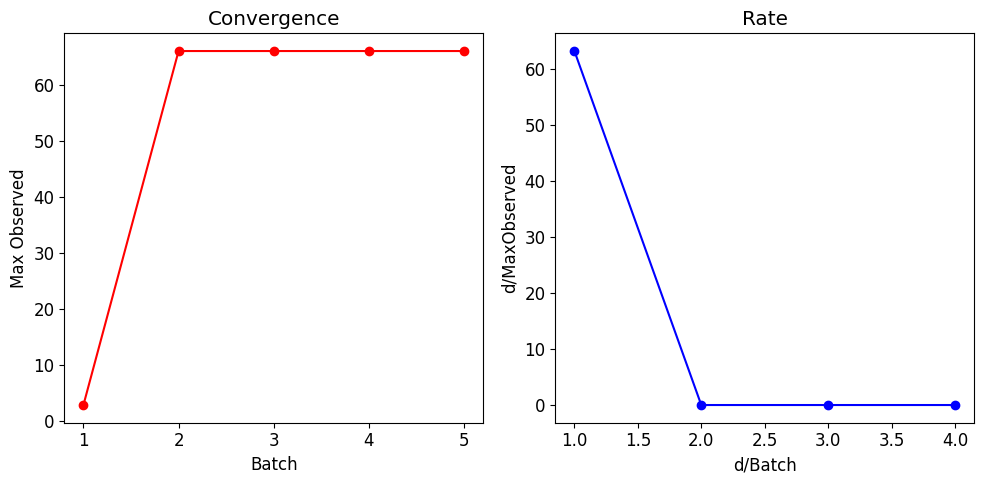

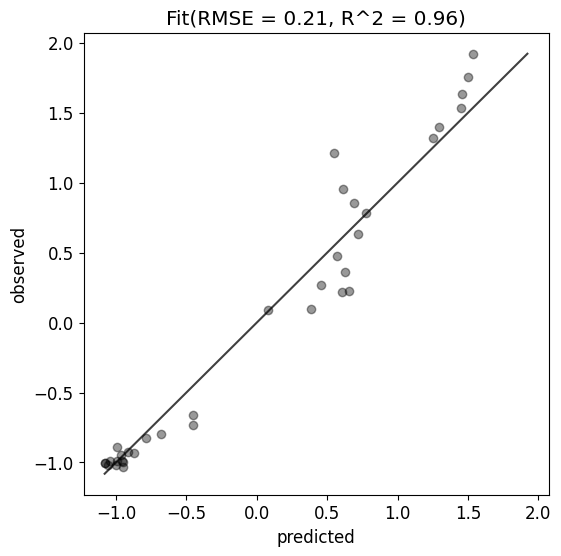

In [13]:
bo.add_results('results/round3.csv')
bo.run()
workflow('round4.csv') 